# Programming Assignment: Размещение баннеров

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import json

sns.set()
%matplotlib inline
from sklearn.cluster import MeanShift

In [240]:
def distance(coord_1, coord_2):
    return np.sqrt(np.sum((coord_1 - coord_2)**2))

def calc_distance(office_coord, centers):
    dist_list = []
    for office in office_coord:
        for i, center in enumerate(centers):
            dist = distance(office_coord[office], center)            
            info = { 
                "office": office, 
                "office_latitude": office_coord[office][0],
                "office_longitude": office_coord[office][1],
                "clust": i,
                "center_latitude": center[0],
                "center_longitude": center[1],
                "distance": dist
            }
            dist_list.append(info)

    return pd.DataFrame(dist_list)

def write_answer(coords):
    with open("assigment_1.txt", "w") as ans:
        ans.write(" ".join(str(x).strip() for x in coords))

In [193]:
office_coord = {
    "Los Angeles": [33.751277, -118.188740],
    "Miami": [25.867736, -80.324116],
    "London": [51.503016, -0.075479],
    "Amsterdam": [52.378894, 4.885084],
    "Beijing": [39.366487, 117.036146],
    "Sydney": [-33.868457, 151.205134]
}

In [82]:
df = pd.read_csv("checkins.dat", sep="|", header=0, skipinitialspace=True, low_memory=False).dropna().reset_index().drop("index", axis=1)

In [24]:
print(df.shape)
df.head()

(396634, 6)


,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


In [25]:
df_clust = df.iloc[:100000, :]

In [47]:
new_cols = [x.strip() for x in df_clust.columns]
df_clust = df_clust.rename(mapper=str, columns=dict(zip(df_clust.columns, new_cols)))

In [48]:
clust = MeanShift(bandwidth=0.1).fit(df_clust[["latitude", "longitude"]])

In [52]:
df_clust["clust"] = clust.labels_

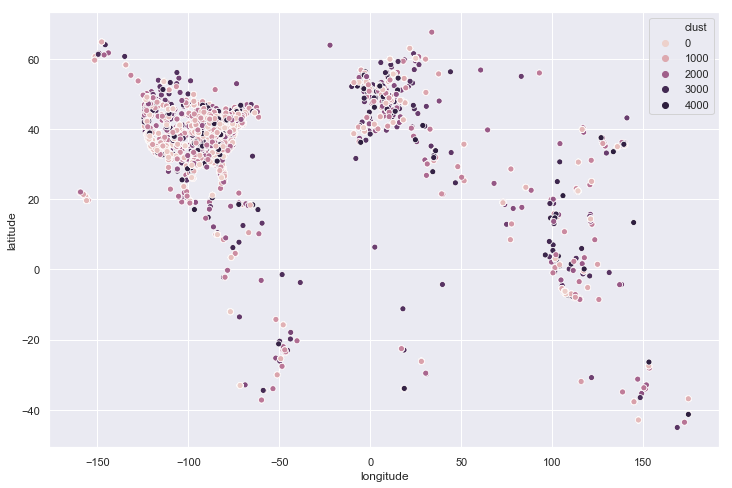

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="longitude", y="latitude", hue="clust", data=df_clust[df_clust["clust"] > 500]);

In [177]:
centers = clust.cluster_centers_
centers_coords = pd.DataFrame(centers, columns=["x", "y"])

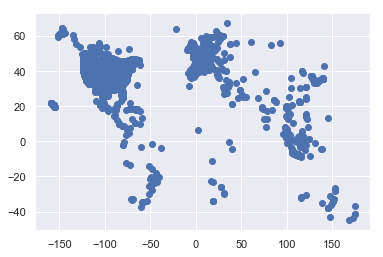

In [179]:
plt.scatter(centers_coords.y, centers_coords.x)

In [203]:
clust.cluster_centers_

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [  38.891565  , -121.2930079 ],
       [  42.5953378 ,  -78.9411461 ],
       [  41.5822716 ,  -85.8344383 ]])

In [230]:
df_dist = calc_distance(office_coord, centers).sort_values(by="distance").reset_index()

In [238]:
write_answer([df_dist.loc[0, "center_latitude"], df_dist.loc[0, "center_longitude"]])

In [239]:
!cat assigment_1.txt

-33.86063042857143 151.20477592857145